# Visual Behavior Neuropixels Quickstart

A short introduction to the Visual Behavior Neuropixels data and SDK. This notebook focuses on aligning neural data to visual and optotagging stimuli. For more information about task and behavioral data, check out the  'Aligning behavioral data to task events with the stimulus and trials tables' tutorial.

Also note that this project shares many features with the [Visual Coding Neuropixels](http://portal.brain-map.org/explore/circuits/visual-coding-neuropixels) and [Visual Behavior 2-Photon](http://portal.brain-map.org/explore/circuits/visual-coding-2p) datasets. Users are encouraged to check out the documentation for these projects for additional information and context.

Contents
-------------
* <a href='#PSTH-for-image-changes'>PSTH for image changes</a>
* <a href='#Plot-Receptive-Fields'>Plot Receptive Fields</a>
* <a href='#Optotagging'>Optotagging</a>

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache

C:\Users\svc_ccg\AppData\Local\Continuum\anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


The `VisualBehaviorNeuropixelsProjectCache` is the main entry point to the Visual Behavior Neuropixels dataset. It allows you to download data for individual recording sessions and view cross-session summary information.

In [2]:
# this path determines where downloaded data will be stored
cache_dir = r"C:\Users\svc_ccg\Desktop\Data\vbn_cache"

cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(
            cache_dir=cache_dir)

# get the metadata tables
units_table = cache.get_unit_table()

channels_table = cache.get_channel_table()

probes_table = cache.get_probe_table()

behavior_sessions_table = cache.get_behavior_session_table()

ecephys_sessions_table = cache.get_ecephys_session_table()

C:\Users\svc_ccg\Documents\GitHub\AllenSDK\allensdk\api\cloud_cache\cloud_cache.py:521: OutdatedManifestWarning: You are loading visual-behavior-neuropixels-2022_project_manifest_v0.1.0.json. A more up to date version of the dataset -- visual-behavior-neuropixels-2022_project_manifest_v0.2.0.json -- exists online. To see the changes between the two versions of the dataset, run
VisualBehaviorNeuropixelsProjectCache.compare_manifests('visual-behavior-neuropixels-2022_project_manifest_v0.1.0.json', 'visual-behavior-neuropixels-2022_project_manifest_v0.2.0.json')
To load another version of the dataset, run
VisualBehaviorNeuropixelsProjectCache.load_manifest('visual-behavior-neuropixels-2022_project_manifest_v0.2.0.json')
  warnings.warn(msg, OutdatedManifestWarning)


This dataset contains ephys recording sessions from 3 genotypes (C57BL6J, VIP-IRES-CrexAi32 and SST-IRES-CrexAi32). For each mouse, two recordings were made on consecutive days. One of these sessions used the image set that was familiar to the mouse from training. The other session used a new image set for which 6 of the images were novel two were familiar. As an example, let's grab a session from an SST mouse during a novel session.

In [10]:
ecephys_sessions_table = ecephys_sessions_table[0]
sst_novel_sessions = ecephys_sessions_table.loc[(ecephys_sessions_table['genotype'].str.contains('Sst')) & 
                                            (ecephys_sessions_table['experience_level']=='Novel')]
sst_novel_sessions.head()

,behavior_session_id,date_of_acquisition,equipment_name,session_type,mouse_id,genotype,sex,project_code,age_in_days,unit_count,...,channel_count,structure_acronyms,image_set,prior_exposures_to_image_set,session_number,experience_level,prior_exposures_to_omissions,file_id,abnormal_activity,abnormal_histology
ecephys_session_id,,,,,,,,,,,,,,,,,,,,,
1052530003,1052572357,2020-09-24 14:34:32.031,NP.0,EPHYS_1_images_H_3uL_reward,524926,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,NeuropixelVisualBehavior,187,2005.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1.0,3,[132],['Thalamus']
1053941483,1053960987,2020-10-01 17:03:58.362,NP.1,EPHYS_1_images_H_3uL_reward,527749,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,180,1543.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1.0,6,False,NaN
1046581736,1046626452,2020-08-27 14:39:26.423,NP.0,EPHYS_1_images_H_5uL_reward,527294,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,146,2193.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1.0,23,[111],['Hippocampus']
1064644573,1064666428,2020-11-19 15:18:01.372,NP.1,EPHYS_1_images_H_3uL_reward,544456,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,120,2254.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1.0,27,False,NaN
1048189115,1048221709,2020-09-03 14:16:57.913,NP.1,EPHYS_1_images_H_3uL_reward,509808,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,NeuropixelVisualBehavior,264,1925.0,...,2304.0,"['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...",H,0.0,2,Novel,1.0,37,False,NaN


Now let's choose one of these sessions to look at more closely.

In [214]:
session_id = sst_novel_sessions.index.values[0]
session = cache.get_ecephys_session(
            ecephys_session_id=session_id)

C:\Users\svc_ccg\AppData\Local\Continuum\anaconda3\lib\site-packages\hdmf\spec\namespace.py:533: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.5.0 is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))
C:\Users\svc_ccg\AppData\Local\Continuum\anaconda3\lib\site-packages\hdmf\spec\namespace.py:533: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.3.0 is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))
C:\Users\svc_ccg\AppData\Local\Continuum\anaconda3\lib\site-packages\hdmf\spec\namespace.py:533: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.1.0 is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))


We can get a high-level summary of this session by accessing its `metadata` attribute:

In [4]:
session.metadata

{'equipment_name': 'NP.0',
 'sex': 'F',
 'age_in_days': 187,
 'stimulus_frame_rate': 60.0,
 'session_type': 'EPHYS_1_images_H_3uL_reward',
 'date_of_acquisition': datetime.datetime(2020, 9, 24, 21, 34, 32, tzinfo=tzutc()),
 'reporter_line': 'Ai32(RCL-ChR2(H134R)_EYFP)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': None,
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': 524926,
 'full_genotype': 'Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
 'behavior_session_id': 1052572357,
 'ecephys_session_id': 1052530003}

Now we can get the unit and channel data for this session. Merging these dataframes will give us CCF coordinates for each unit

In [14]:
units = session.get_units()
channels = session.get_channels()

unit_channels = units.merge(channels, left_on='peak_channel_id', right_index=True)

Let's look at which brain structures were recorded during this session

In [18]:
unit_channels.groupby('structure_acronym')['cluster_id'].count()

structure_acronym
APN      214
CA1      185
CA3       16
DG        71
Eth       17
FF         3
HPF       16
HY        10
LGd       38
LP        12
MB        22
MGd       32
MGm       13
MGv       88
MRN      118
NB        39
PIL       52
POST      49
PoT       10
SNr        3
TH        74
VISam     89
VISl      54
VISp     170
VISpm     97
VISrl    161
ZI        33
Name: cluster_id, dtype: int64

### PSTH for image changes

Now we'll grab spike times and calculate the change response for 'good' units in V1. Note that how you filter units will depend on your analysis. Consult the unit metrics notebook for more details.

In [ ]:
#first let's sort our units by depth
unit_channels = unit_channels.sort_values('probe_vertical_position', ascending=False)

#now we'll filter them
good_unit_filter = ((unit_channels['snr']>1)&
                    (units['isi_violations']<1)&
                    (units['firing_rate']>0.1))

good_units = unit_channels.loc[good_unit_filter]
spike_times = session.spike_times

We can get the times when the image changes occurred from the stimulus presentations table. For now, we'll only take the image changes shown during the active behavior block

In [80]:
stimulus_presentations = session.stimulus_presentations
change_times = stimulus_presentations[stimulus_presentations['active']&
                            stimulus_presentations['is_change']]['start_time'].values

In [105]:
#Convenience function to compute the PSTH
def makePSTH(spikes, startTimes, windowDur, binSize=0.001):
    bins = np.arange(0,windowDur+binSize,binSize)
    counts = np.zeros(bins.size-1)
    for i,start in enumerate(startTimes):
        startInd = np.searchsorted(spikes, start)
        endInd = np.searchsorted(spikes, start+windowDur)
        counts = counts + np.histogram(spikes[startInd:endInd]-start, bins)[0]
    
    counts = counts/startTimes.size
    return counts/binSize, bins

We'll include enough time in our plot to see three image responses: the pre-change image response, the change response and the post-change response

In [160]:
#Here's where we loop through the units in our area of interest and compute their PSTHs
area_of_interest = 'VISp'
area_change_responses = []
area_units = good_units[good_units['structure_acronym']==area_of_interest]
time_before_change = 1
duration = 2.5
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    unit_change_response, bins = makePSTH(unit_spike_times, 
                                          change_times-time_before_change, 
                                          duration, binSize=0.01)
    area_change_responses.append(unit_change_response)
area_change_responses = np.array(area_change_responses)

<IPython.core.display.Javascript object>


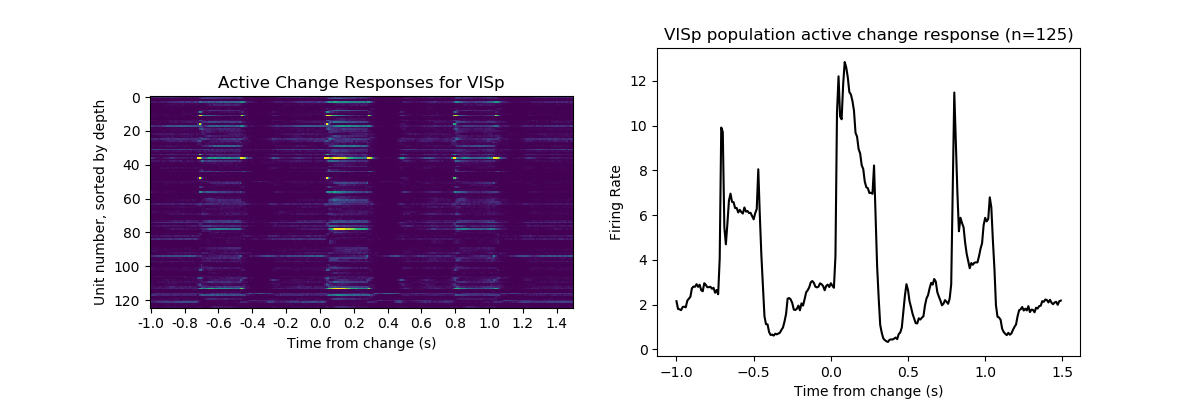

Text(0, 0.5, 'Firing Rate')

In [156]:
#Plot the results
fig, ax = plt.subplots(1,2)
fig.set_size_inches([12,4])

clims = [np.percentile(area_change_responses, p) for p in (0.1,99.9)]
im = ax[0].imshow(area_change_responses, clim=clims)
ax[0].set_title('Active Change Responses for {}'.format(area_of_interest))
ax[0].set_ylabel('Unit number, sorted by depth')
ax[0].set_xlabel('Time from change (s)')
ax[0].set_xticks(np.arange(0, bins.size-1, 20))
_ = ax[0].set_xticklabels(np.round(bins[:-1:20]-time_before_change, 2))

ax[1].plot(bins[:-1]-time_before_change, np.mean(area_change_responses, axis=0), 'k')
ax[1].set_title('{} population active change response (n={})'\
                .format(area_of_interest, area_change_responses.shape[0]))
ax[1].set_xlabel('Time from change (s)')
ax[1].set_ylabel('Firing Rate')


### Plot Receptive Fields

Now we'll plot receptive fields for these same units. First we need to get stimulus presentation data for the receptive field mapping stimulus (gabors)

In [123]:
rf_stim_table = stimulus_presentations[stimulus_presentations['stimulus_name'].str.contains('gabor')]
xs = np.sort(rf_stim_table.position_x.unique()) #positions of gabor along azimuth
ys = np.sort(rf_stim_table.position_y.unique()) #positions of gabor along altitude

In [167]:
area_rfs = []
for iu, unit in area_units.iterrows():
    unit_spike_times = spike_times[iu]
    unit_rf = np.zeros([ys.size, xs.size])
    
    for ix, x in enumerate(xs):
        for iy, y in enumerate(ys):
            stim_times = rf_stim_table[(rf_stim_table.position_x==x)
                                      &(rf_stim_table.position_y==y)]['start_time'].values
            unit_response, bins = makePSTH(unit_spike_times, 
                                          stim_times+0.01, 
                                          0.2, binSize=0.001)
            unit_rf[iy, ix] = unit_response.mean()
    area_rfs.append(unit_rf)

<IPython.core.display.Javascript object>


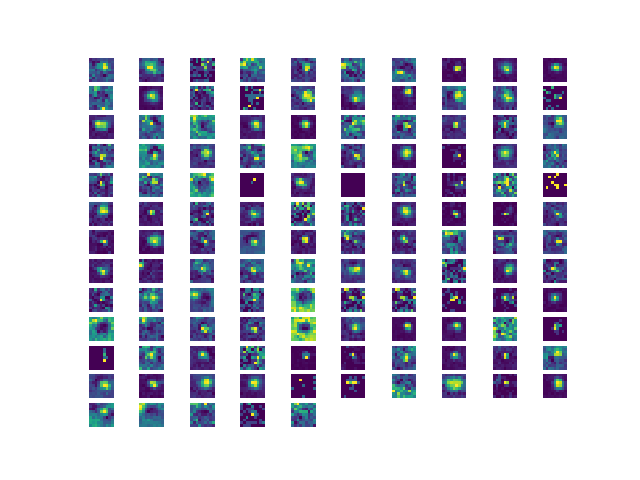

In [169]:
fig, axes = plt.subplots(int(len(area_rfs)/10)+1, 10)
for irf, rf in enumerate(area_rfs):
    ax_row = int(irf/10)
    ax_col = irf%10
    axes[ax_row][ax_col].imshow(rf, origin='lower')
for ax in axes.flat:
    ax.axis('off')

### Optotagging

Since this is an SST mouse, we should see putative SST+ interneurons that are activated during our optotagging protocol. Let's load the optotagging stimulus table and plot PSTHs triggered on the laser onset. For more examples, you can check out the Visual Coding Neuropixels Optagging notebook [here](https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html)

In [173]:
opto_table = session.optotagging_table
opto_table.head()

,start_time,condition,level,stop_time,stimulus_name,duration
id,,,,,,
0,8803.77363,half-period of a cosine wave,0.78,8804.77363,raised_cosine,1.00
1,8805.63517,a single square pulse,1.00,8805.64517,pulse,0.01
2,8807.35557,a single square pulse,1.70,8807.36557,pulse,0.01
3,8809.04593,a single square pulse,1.00,8809.05593,pulse,0.01
4,8811.07608,half-period of a cosine wave,0.78,8812.07608,raised_cosine,1.00


If you check out this table, you'll see that we use 2 different laser waveforms: a half-period cosine wave that's 1 second long and a short square pulse that's 10 ms long. We drive each at three light levels, giving us 6 total conditions. Now let's plot how cortical neurons respond to the short pulse at high power.

In [192]:
duration = opto_table.duration.min()
level = opto_table.level.max()

cortical_units = good_units[good_units['structure_acronym'].str.contains('VIS')]


opto_times = opto_table.loc[(opto_table['duration']==duration)&
                            (opto_table['level']==level)]['start_time'].values
opto_response = []
unit_id = []
for iu, unit in cortical_units.iterrows():
    unit_spike_times = spike_times[iu]
    unit_response, bins = makePSTH(unit_spike_times, 
                          opto_times-0.05, 0.1, 
                          binSize=0.0005)
    
    opto_response.append(unit_response)
    unit_id.append(iu)

opto_response = np.array(opto_response)

<IPython.core.display.Javascript object>


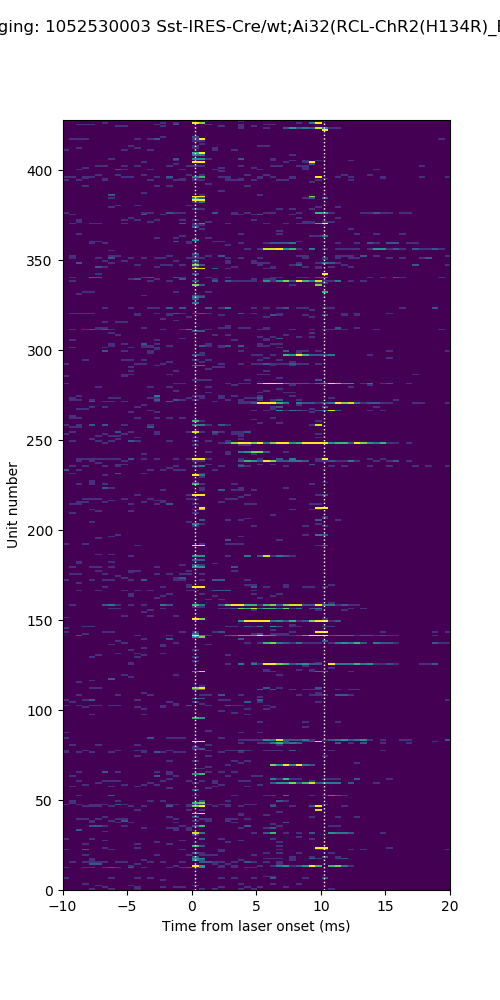

Text(0, 0.5, 'Unit number')

In [212]:
fig, ax = plt.subplots()
fig.set_size_inches((5,10))
fig.suptitle('Optotagging: ' + str(session.metadata['ecephys_session_id'])
             + ' ' + session.metadata['full_genotype'])
im = ax.imshow(opto_response[:, 80:140], extent=[-10, 20, 0, len(unit_id)], 
               origin='lower', aspect='auto')
min_clim_val = 0
max_clim_val = 300
im.set_clim([min_clim_val, max_clim_val])    
[ax.axvline(bound, linestyle=':', color='white', linewidth=1.0)\
     for bound in [0.25, 10.25]]
ax.set_xlabel('Time from laser onset (ms)')
ax.set_ylabel('Unit number')

Here we can see that most units don't respond to the short laser pulse. But there is a population of ~20 units that do show elevated firing rates. Note that the activity occurring at the onset and offset of the laser (along the dotted lines) is likely artifactual and should be excluded from analysis.